In [1]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import random
import matplotlib.pyplot as plt

In [25]:
train_dir = 'C:\\Users\\janek\\Downloads\\archive (2)\\train'
val_dir = 'C:\\Users\\janek\\Downloads\\archive (2)\\test'

In [2]:
# train_dir = 'C:\\Users\\janek\\Downloads\\archive (2)\\train'
# val_dir = 'C:\\Users\\janek\\Downloads\\archive (2)\\test'
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(48,48),
#         batch_size=64,
#         color_mode="grayscale",
#         class_mode='categorical')

# validation_generator = val_datagen.flow_from_directory(
#         val_dir,
#         target_size=(48,48),
#         batch_size=64,
#         color_mode="grayscale",
#         class_mode='categorical')

In [95]:
def load_images(directory):
    image_paths = []
    categories = os.listdir(directory)
    for category in categories:
        category_dir = os.path.join(directory, category)
        if os.path.isdir(category_dir):
            image_files = os.listdir(category_dir)
            for img in image_files:
                img_path = os.path.join(category_dir, img)
                if os.path.isfile(img_path):
                    image_paths.append(img_path)
    return image_paths

In [130]:
train_images = load_images(train_dir)
val_images = load_images(val_dir)

In [110]:
def visualize_images(images, sample_size, visualization_size=3):
    visualization_images = random.sample(images, visualization_size)
    
    plt.figure(figsize=(15, 5))
    
    for i, image_path in enumerate(visualization_images, 1):
        plt.subplot(1, visualization_size, i)
        
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(image, cmap='gray')
        plt.title('Original - no filters added')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

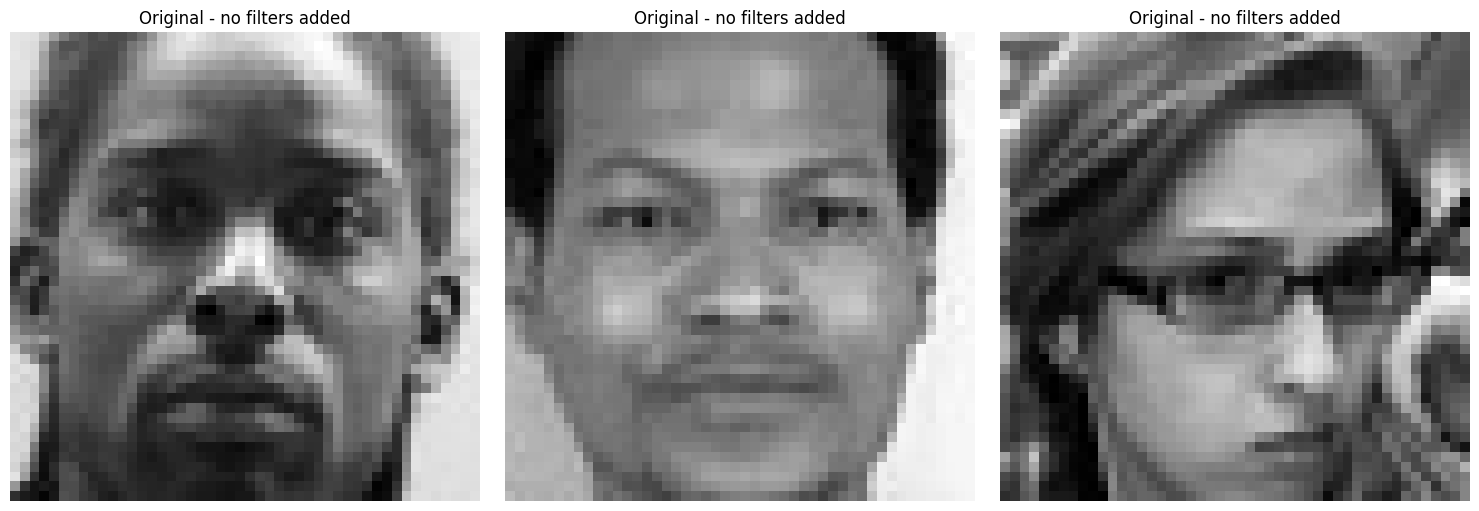

In [112]:
visualize_images(train_images, sample_size=3)

In [123]:
def display_edges(image_paths, num_images=3):
    selected_images = random.sample(image_paths, num_images)
    
    for image_path in selected_images:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Wykrycie krawędzi za pomocą operatora Sobela
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        sobel_edges = cv2.magnitude(sobel_x, sobel_y)

        # Wykrycie krawędzi za pomocą operatora Canny
        canny_edges = cv2.Canny(image, 100, 200)

        # Wyświetlenie obrazów
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(sobel_edges, cmap='gray')
        plt.title('Sobel Edges')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(canny_edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        plt.show()

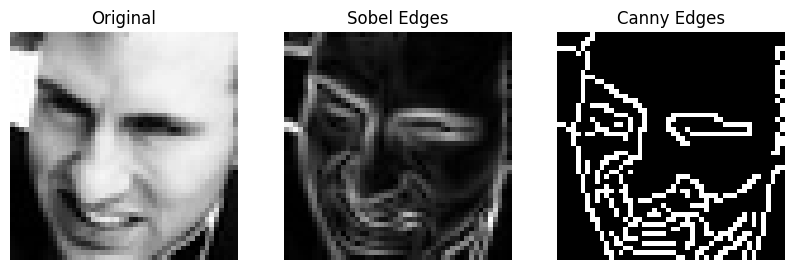

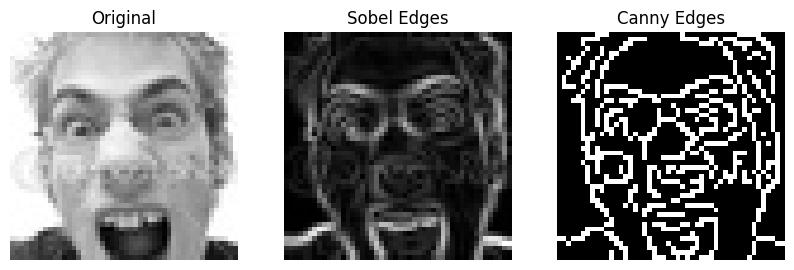

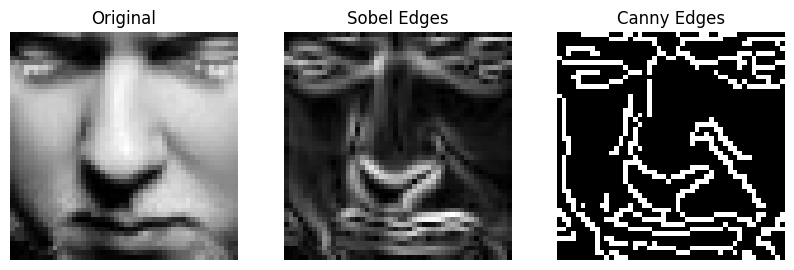

In [128]:
display_edges(train_images)

In [136]:
sobel_train_images = []

for image_path in train_images:
    # Wczytanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Wykrycie krawędzi za pomocą operatora Sobela
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    
    # Dodanie obrazu krawędzi do listy
    sobel_train_images.append(sobel_edges)

In [137]:
sobel_train_images

[array([[  0.        , 140.        ,  72.        , ..., 224.        ,
         192.        ,   0.        ],
        [ 18.        , 142.89856542,  68.30812543, ..., 226.31835984,
         198.16155026,   2.        ],
        [ 14.        , 129.00387591,  58.82176468, ..., 230.03477998,
         205.06096654,   4.        ],
        ...,
        [ 52.        ,  52.34500931,  53.23532662, ..., 149.93331851,
         250.68306684,  20.        ],
        [ 10.        ,  27.01851217,  42.3792402 , ...,  99.2975327 ,
         260.09998078,  60.        ],
        [  0.        ,  28.        ,  22.        , ...,  62.        ,
         250.        ,   0.        ]]),
 array([[  0.        ,   6.        ,  24.        , ...,   4.        ,
          28.        ,   0.        ],
        [ 98.        ,  95.04735662,  78.63841301, ...,  78.10249676,
          74.96665926,  58.        ],
        [  2.        ,  12.80624847,  13.03840481, ...,  52.47856705,
          31.144823  ,   6.        ],
        ...,


In [ ]:
sobel_train_images_array = np.array(sobel_train_images)

# Definicja generatora obrazów
datagen = ImageDataGenerator(
    # Tutaj możesz zdefiniować różne transformacje obrazów, takie jak obrót, przesunięcie, skalowanie itp.
    # Sprawdź dokumentację: https://keras.io/api/preprocessing/image/
)

# Dopasowanie generatora do danych
datagen.fit(sobel_train_images_array)

# Przykładowe użycie generatora do generowania przetworzonych obrazów
for batch in datagen.flow(sobel_train_images_array, batch_size=32):
    # Tutaj możesz wykorzystać wygenerowane przetworzone obrazy do treningu modelu
    # batch zawiera mini-pakiet przetworzonych obrazów
    pass  # Przykładowe zastosowanie

In [129]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [131]:
train_generator = train_datagen.flow_from_directory(
        train_images,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_images,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

TypeError: listdir: path should be string, bytes, os.PathLike or None, not list

In [ ]:
emotion_model = Sequential()

# Pierwsza warstwa konwolucyjna
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Druga warstwa konwolucyjna
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Warstwa spłaszczająca
emotion_model.add(Flatten())

# Warstwy gęsto połączone
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

# Wyświetlenie podsumowania modelu
#emotion_model.summary()

In [ ]:
# emotion_model = Sequential()

# emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Dropout(0.25))

# emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# emotion_model.add(Dropout(0.25))

# emotion_model.add(Flatten())
# emotion_model.add(Dense(1024, activation='relu'))
# emotion_model.add(Dropout(0.5))
# emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
import tensorflow as tf

# Define a learning rate schedule
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001, 
    decay_steps=10000,  # Adjust as needed
    decay_rate=0.9  # Adjust as needed
)

# Initialize the Adam optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

# Compile the model with the updated optimizer
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# from keras.models import load_model
# loaded_model = load_model("emotion_model.h5")

In [ ]:
import scipy
history = emotion_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,  # przykładowa liczba epok
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size)

In [ ]:
emotion_model.save("emotion_model_2.h5")

In [ ]:
test_loss, test_acc = emotion_model.evaluate(validation_generator)
print('Dokładność modelu na zestawie testowym:', test_acc)

In [ ]:
emotion_model.save_weights('emotion_model_weights.h5')


In [ ]:
import cv2
import numpy as np

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame, (1200, 860), interpolation=cv2.INTER_CUBIC))
    
    # Wait for the 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 1st approach 20 epochs,  initial_learning_rate=0.0001, color_mode="grayscale"